In [1]:
raw_data <- read.csv("SSL_RAT_SEX_Code_50_60.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 34519

In [2]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','SEX_CODE_CD')]

In [3]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 34519

In [4]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD
346,33486,50-60,0,5,0,0,0,-0.8,0,1
342,41218,50-60,0,4,1,0,0,-0.5,1,1
333,64759,50-60,0,1,4,1,0,0.9,4,1
323,94157,50-60,0,0,0,0,1,-0.1,0,1
320,105580,50-60,0,1,2,0,1,0.9,2,1
310,136256,50-60,0,0,1,0,1,0.5,0,1


In [5]:
library(MatchIt)
library(dplyr)
library(ggplot2)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [6]:
#SSL_SCORE
complete_data %>%
  group_by(SEX_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

SEX_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,6538,181.2069,0.1883842
1,27981,181.2420,0.1011148


In [7]:
# For SSL_SCORE_RANK
complete_data %>%
  group_by(SEX_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE_RANK),
            STD_ERROR = sd(SSL_SCORE_RANK) / sqrt(NUMBER_OF_PEOPLE))

SEX_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,6538,370539.5,169.1318
1,27981,370164.0,97.2352


In [8]:
# T-test without PSM for SSL_SCORE and SEX_CODE_CD
attach(complete_data)
t.test(SSL_SCORE~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by SEX_CODE_CD
t = -0.16406, df = 10640, p-value = 0.8697
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4541763  0.3840216
sample estimates:
mean in group 0 mean in group 1 
       181.2069        181.2420 


In [9]:
# T-test without PSM for SSL_SCORE_RANK and SEX_CODE_CD
t.test(SSL_SCORE_RANK~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by SEX_CODE_CD
t = 1.9248, df = 11284, p-value = 0.05428
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  -6.897844 757.924414
sample estimates:
mean in group 0 mean in group 1 
       370539.5        370164.0 


In [10]:
mod_match <- matchit(SEX_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

Warning message in matchit2nearest(structure(c(1L, 1L, 1L, 1L, 1L, 1L, 0L, 1L, 1L, :
"Fewer control than treated units and matching without replacement.  Not all treated units will receive a match.  Treated units will be matched in the order specified by m.order: largest"

In [11]:
mod_match


Call: 
matchit(formula = SEX_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All          6538   27981
Matched      6538    6538
Unmatched       0   21443
Discarded       0       0


In [12]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

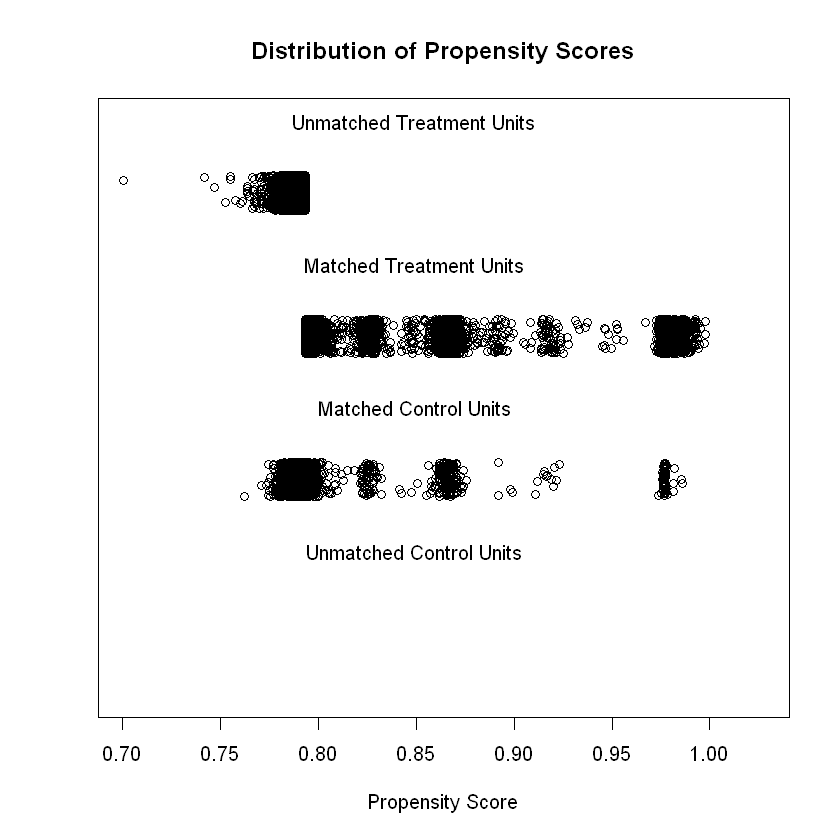

In [13]:
plot(mod_match, type = "jitter")

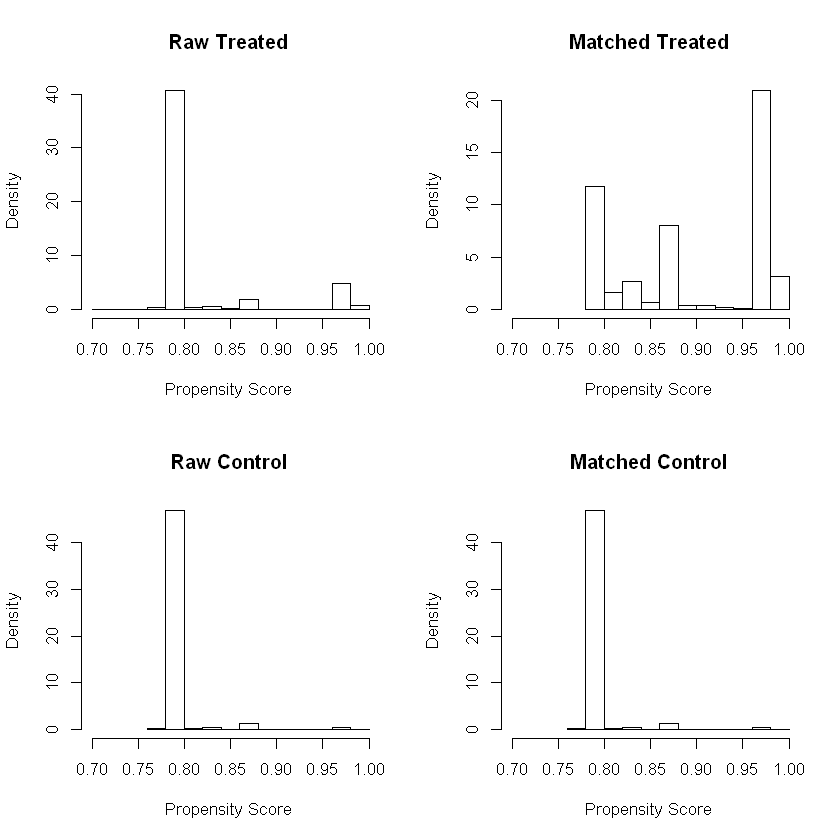

In [14]:
plot(mod_match, type = "hist")

In [15]:
head(matched)

,SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD,distance,weights
1,346,33486,50-60,0,5,0,0,0,-0.8,0,1,0.9277898,1
2,342,41218,50-60,0,4,1,0,0,-0.5,1,1,0.9459997,1
3,333,64759,50-60,0,1,4,1,0,0.9,4,1,0.9979215,1
5,320,105580,50-60,0,1,2,0,1,0.9,2,1,0.9324984,1
6,310,136256,50-60,0,0,1,0,1,0.5,0,1,0.8604552,1
7,304,157766,50-60,0,1,0,0,1,-0.2,0,0,0.8273808,1


In [16]:
# Doing T - test on matched records
attach(matched)

The following objects are masked from complete_data:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, SEX_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK



In [17]:
gender_female  <-subset(matched,SEX_CODE_CD == 0)
gender_male<-subset(matched,SEX_CODE_CD == 1)


In [18]:
t.test(SSL_SCORE~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by SEX_CODE_CD
t = -21.429, df = 11319, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.003090 -6.661639
sample estimates:
mean in group 0 mean in group 1 
       181.2069        188.5393 


In [19]:
t.test(SSL_SCORE_RANK~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by SEX_CODE_CD
t = 23.721, df = 10106, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 7689.998 9075.429
sample estimates:
mean in group 0 mean in group 1 
       370539.5        362156.8 
